In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.regression as snsl
import pandas as pd

from datetime import datetime
import tushare as ts

代码部分：
股票收盘价走势曲线
http://www.jianshu.com/p/bf9c20ef160e

2018-02-09
2017-02-09


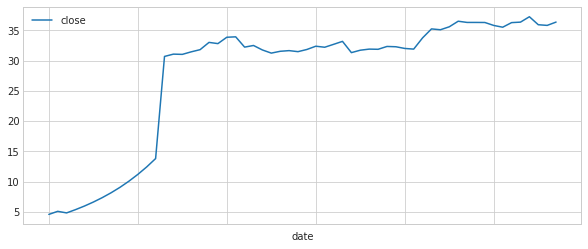

In [10]:
sns.set_style("whitegrid")
end = datetime.today() #开始时间结束时间，选取最近一年的数据
start = datetime(end.year-1,end.month,end.day)
end = str(end)[0:10]
start = str(start)[0:10]
print (end)
print (start)

stock = ts.get_hist_data('002460',start,end)#选取一支股票
stock['close'].plot(legend=True ,figsize=(10,4))
plt.show()

同理，可以做出5日均线、10日均线以及20日均线
如果是5日均量線，那麼用最近5日內的成交量之和除以5，就可以得到第5的均量線數值。如果是10日均量線，那麼用最近10日內的成交量之和除以10，就可以得到第10日的均量線數值，如果是30日均量線，那麼用最近30日內的成交量之和除以30，就可以得到第30日的均量線數值。

原文網址：https://read01.com/N6AGzB.html

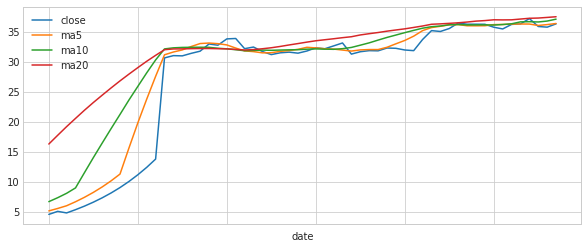

In [3]:
stock[['close','ma5','ma10','ma20']].plot(legend=True ,figsize=(10,4))

股票每日涨跌幅度

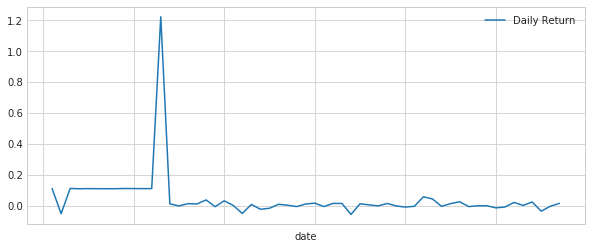

In [4]:
stock['Daily Return'] = stock['close'].pct_change()
stock['Daily Return'].plot(legend=True,figsize=(10,4))

核密度估计

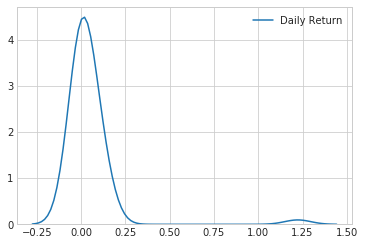

In [5]:
sns.kdeplot(stock['Daily Return'].dropna())

核密度估计+统计柱状图

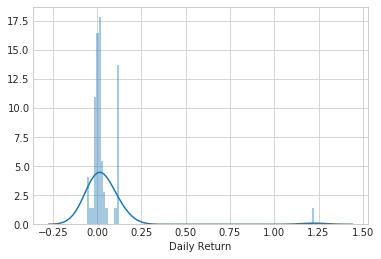

In [6]:
sns.distplot(stock['Daily Return'].dropna(),bins=100)

两支股票的皮尔森相关系数

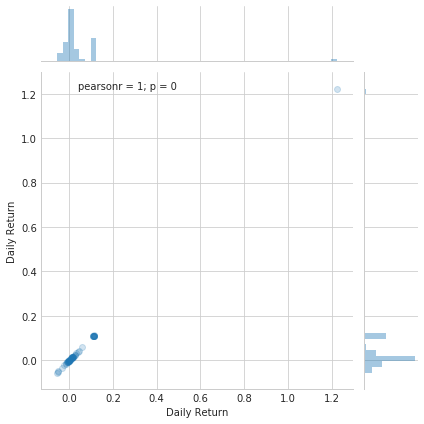

In [7]:
sns.jointplot(stock['Daily Return'],stock['Daily Return'],alpha=0.2)

多只股票相关性计算

In [8]:
# 随便选取了四支互联网相关的股票
stock_lis=['300113','300343','300295','300315']
df=pd.DataFrame()
for stock in stock_lis:
     closing_df = ts.get_hist_data(stock,start,end)['close']
     df = df.join(pd.DataFrame({stock:closing_df}),how='outer')
tech_rets = df.pct_change()
snsl.corrplot(tech_rets.dropna())

AttributeError: module 'seaborn.regression' has no attribute 'corrplot'

简单地计算股票的收益与风险，衡量股票收益与风险的数值分别为股票涨跌的平均值以及标准差，平均值为正则说明收益是正的，标准差越大则说明股票波动大，风险也大。

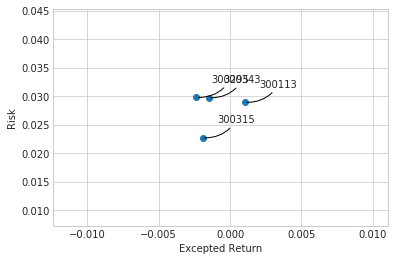

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.regression as snsl
import pandas as pd

from datetime import datetime
import tushare as ts

sns.set_style("whitegrid")
end = datetime.today() #开始时间结束时间，选取最近一年的数据
start = datetime(end.year-1,end.month,end.day)
end = str(end)[0:10]
start = str(start)[0:10]

stock_lis=['300113','300343','300295','300315']
df=pd.DataFrame()
for stock in stock_lis:
     closing_df = ts.get_hist_data(stock,start,end)['close']
     df = df.join(pd.DataFrame({stock:closing_df}),how='outer')
tech_rets = df.pct_change()

rets = tech_rets.dropna()
plt.scatter(rets.mean(),rets.std())
plt.xlabel('Excepted Return')
plt.ylabel('Risk')
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):#添加标注
     plt.annotate(
                  label,
                  xy =(x,y),xytext=(15,15),
                  textcoords = 'offset points',
                  arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3'))